# MTH5001: Introduction to Computer Programming 2019/20

## Final Report Project: "Lattice Paths"

### Instructions:

First, please type your name and student number into the Markdown cell below:

**Name:** 

**Student number:** 

You must write your answers in this Jupyter Notebook, using either Python code or Markdown, as appropriate. (We have left blank code and/or Markdown cells for you, but you may also create additional cells if you feel you need to.)

Your code must be **well documented**. As a rough guide, you should aim to include one line of comments for each line of code. 

You should also use **sensible variable names**, so that your code is as clear as possible. If your code works but is difficult to read, then you may lose marks.

### Submission deadline:

You must submit your work via QMPlus, to the "Final Report Project" assignment in the "Final Report Project" section under the "Assessment" tab.

The submission deadline is **11:55pm on Monday 18 May, 2020**. Late submissions will be penalised according to the School's [guidelines](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=89105).

Your lecturers will respond to project-related emails until 5:00pm on Friday 15 May, 2020, only. You should aim to have your project finished by this time.

### Marking:

The project is worth 70% of your final mark for this module.

The total number of marks available for the project is 100. Attempt all parts of all questions.

When writing up your project, good writing style is even more important than in written exams. 
According to the [advice in the student handbook](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87786),

> To get full marks in any assessed work (tests or exams) you must normally not only give the right answers but also explain your working clearly and give reasons for your answers by writing legible and grammatically correct English sentences. Mathematics is about logic and reasoned arguments and the only way to present a reasoned and logical argument is by writing about it clearly. Your writing may include numbers and other mathematical symbols, but they are not enough on their own. You should copy the writing style used in good mathematical textbooks, such as those recommended for your modules. **You can expect to lose marks for poor writing (incorrect grammar and spelling) as well as for poor mathematics (incorrect or unclear logic).**

### Plagiarism warning:

Your work will be tested for plagiarism, which is an assessment offence, according to the [School's policy on Plagiarism](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87787). In particular, while only academic staff will make a judgement on whether plagiarism has occurred in a piece of work, we will use the software "Turnitin" to help us assess how much of your work matches other sources. You will have the opportunity to upload your work, see the Turnitin result, and edit your work accordingly before finalising your submission.

If necessary, you may summarise relevant parts of books, online notes or other resources.
However, you must use your own words as far as possible, and you **must** [reference](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87793) any sources that you use. If you decide to work with other students on parts of the project, then you **must** write up your work individually. 

You should also note that some of the questions are personalised in the sense that you will need to import and manipulate data that will be unique to you (i.e. no other student will have the same data).

## Background information

In this project you will learn about a field of mathematics called [lattice paths](https://en.wikipedia.org/wiki/Lattice_path). 
(You should read the linked article for an introduction.)

An important class of lattice paths are **simple random walks** on the square lattice $\mathbb Z^2$: starting at the origin $(0,0)$, these paths are generated by taking steps of length $1$ in randomly chosen directions (east, north, west, or south). For example, taking a north step, then an east step, then a south step gives the path $(0,0)$, $(0,1)$, $(1,1)$, $(1,0)$. As there are four possibilities for each step, there are precisely $4^n$ different simple random walks with $n$ steps.

In this project we will also consider lattice paths with **self-avoidance**, i.e. lattice paths that are not allowed to step onto themselves. For example, the self-avoiding path in the picture below starts at the origin, has $20$ steps, and ends at position $(-1,5)$.

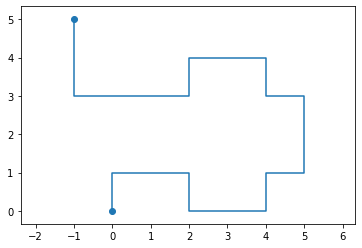

In general, there are fewer self-avoiding lattice paths than there are simple random walks, because requiring that a path not step onto itself limits the choice of direction at each step. For example, there are $4^3 = 64$ simple random walks with $n=3$ steps (on $\mathbb Z^2$, starting at the origin), but only $4\cdot3\cdot3=36$ self-avoiding lattice paths with $n=3$ steps (you might like to draw them all on a piece of paper to convince yourself). As mentioned above, the number of $n$-step simple random walks is precisely $4^n$; one of your first tasks will be to investigate how the number of $n$-step self-avoiding paths grows as a function of $n$.

We will also consider the effect of random **defects** of the lattice, where certain points of the lattice are randomly removed and therefore cannot be visited by a lattice path. As with self-avoidance, it should be clear that such defects reduce the overall number of allowed paths compared to simple random walks.

### Some code to get you started
It is very easy to find code for enumerating (i.e. counting all possible) self-avoiding lattice paths on the internet, so we'll spare you the effort and provide some code. The function `enumerate_paths` given below enumerates all $n$-step self-avoiding lattice paths on the square lattice $\mathbb Z^2$ (starting at the origin). The code is adapted from https://oeis.org/A001411.

In [1]:
# You may wish to use this cell to import some useful packages; two suggestions have been included for you
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Code for counting n-step self-avoiding lattice paths on the square lattice
# Code from Robert FERREOL, Nov 30 2018, rewritten by Thomas PRELLBERG, Feb 26 2020
# Source: https://oeis.org/A001411, accessed Feb 20 2020

edges = [[1, 0], [0, 1], [-1, 0], [0, -1]]

make_step = lambda point, edge: [x+y for x,y in zip(point, edge)]

def enumerate_paths(n, Path=[[0, 0]]):
    if n==0: 
        count=1
    else:
        next_points = [make_step(Path[-1], edge) for edge in edges]
        allowed_points = [point for point in next_points if point not in Path]
        count = sum([enumerate_paths(n-1, Path+[point]) for point in allowed_points])
    return count

Notice that the above code is uncommented. This is because one of your tasks is to clearly explain what each line of this code does (see Question 1 below).

First let's use the function `enumerate_paths` to count the number of $n$-step self-avoiding lattice paths for $n=1,2,\dots,10$:

In [3]:
[enumerate_paths(n) for n in range(11)]

[1, 4, 12, 36, 100, 284, 780, 2172, 5916, 16268, 44100]

We see that the number of $n$-step self-avoiding lattice paths on the square lattice is given by the sequence

$$1, 4, 12, 36, 100, 284, 780, 2172, 5916, 16268, 44100, \ldots\;.$$

That is, there is exactly one such path for $n=0$, four paths for $n=1$, $12$ paths for $n=2$, and so on. (Again, you may wish to convince yourself of this by drawing some pictures on a piece of paper.)

The entries in this sequence grow exponentially, but how do they compare with the number of simple random walks? Remember that the number of $n$-step random walks on the square lattice is precisely $4^n$. We see that there are considerably fewer self-avoiding paths, and it turns out that their number grows roughly as $2.638^n$. One way of confirming this is to plot the ratio of subsequent terms against the inverse number of steps, and extrapolate the curve to zero.

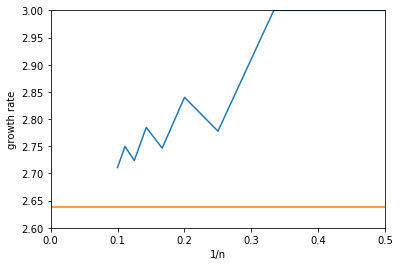

In [4]:
N=10
plt.plot([1/n for n in range(1, N+1)],[enumerate_paths(n)/enumerate_paths(n-1) for n in range(1, N+1)])
plt.plot([0, 0.5], [2.638, 2.638])
plt.xlabel('1/n')
plt.ylabel('growth rate')
plt.xlim([0, 0.5])
plt.ylim([2.6, 3])
plt.show()

Even from these fairly short paths we see that the ratio seems to tend to a number around $2.65$. Plotting more values of $n$ would further confirm this. (You might like to try doing this, but note that it will take longer to run `enumerate_paths(n)` for larger values of `n`.)

# The project

We now outline your specific tasks for the project. These are broken up into four parts, each containing several questions. Remember that you should attempt each part of each question. Read the questions carefully and make sure to answer everything that is asked.

### Part I: Randomly generating and drawing self-avoiding paths [35 marks]

**1. [10 marks]** Explain in detail how the function `enumerate_paths` and the related code defined above works. More specifically:
- Explain the purpose of the variable `edges`.
- Explain the purpose of the function `make_step`.
- Explain how the function `enumerate_paths` works. In particular:
    - Describe the input parameters and the output of this function, in particular the meaning of `Path=[[0, 0]]`.
    - Explain the purpose of the variable `next_points`.
    - Explain the purpose of the variable `allowed_points`.
    - Most importantly, explain the meaning of `count=sum([enumerate_paths(n-1, Path+[point]) for point in allowed_points])`.
- Run the command `[enumerate_paths(n, [[0, 0], [1, 0]]) for n in range(10)]` and explain the output.

Your explanation(s) should make it clear how the function `enumerate_paths` actually does its job, i.e. enumerating all self-avoiding lattice paths with a given number of steps. For example, it is not enough to say "the variable `edges` is a list with four elements". That is obvious. You should instead explain what those four elements represent in the context of the problem, and how they are used in the function `enumerate_paths`.

**2. [10 marks]** By modifying the function `enumerate_paths`, or otherwise, write a function `generate_path` which returns a random self-avoiding lattice path of length $n$ (on $\mathbb Z^2$, starting at the origin). By "random" we mean that the direction of each step should be randomly chosen; you may wish to use list indexing and an appropriate function from the package `random` for this purpose. Your function `generate_path` should satisfy the following properties:
* It should have a single required input, an integer `n`. You may also find it useful to have an optional input `Path`, as in the function `enumerate_paths`.
* It should return a list whose elements are lists of length $2$, representing points in $\mathbb Z^2$ visited by the lattice path. 
* It may happen that a partially completed path cannot be extended to one with $n$ steps without intersecting itself; in this case, the function should simply return the 'trapped' path of length $<n$. For example, in the picture below, the path is trapped at $(1,-2)$ and cannot be extended further:

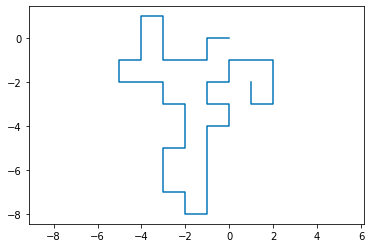


The following skeleton code might help you. You are welcome to write your own code entirely instead.
```python

def generate_path(     ): # Fill in the inputs
    if n>0: 
        next_points = # Define the list of possible 'next points' at the current step
        allowed_points = # Define the list of 'allowed points' at the current step
        if : # Add a condition which is true when there exist possible allowed points
            new_point = # Define the next point in the path by randomly choosing one of the allowed points
            Path = # Run generate_path with appropriate inputs
    return Path
```

**3. [5 marks]** Use your function `generate_path` from Question 2 to produce two figures:

(i) Create two self-avoiding lattice paths using `generate_path(100)` and draw these together in one figure. 

(ii) Create 10 self-avoiding lattice paths using `generate_path(10000)` and draw these together in a second figure. 

Ensure for each figure that the horizontal and vertical axes are drawn to the same scale. 

**4. [10 marks]** As you will likely have seen from the pictures you created in Question 3, two self-avoiding paths starting at the origin are very likely to intersect each other by visiting some of the same lattice sites. Write a function `test_for_intersection` which takes as input two self-avoiding paths starting at the origin and decides whether these paths intersect each other (beyond having the origin as a common point). Your function should satisfy the following properties:
* The input should be two lists of points.
* It should return `True` if the paths represented by these lists intersect, and `False` if they do not.

Use your function to decide which of the following four paths intersect each other:
```python
path1 = [[0, 0],[ 0,-1],[-1,-1],[-2,-1],[-3,-1],[-4,-1],[-5,-1],[-5, 0]]
path2 = [[0, 0],[ 1, 0],[ 2, 0],[ 2,-1],[ 3,-1],[ 4,-1],[ 5,-1],[ 6,-1],[ 6,-2],[ 7,-2]]
path3 = [[0, 0],[ 1, 0],[ 1, 1],[ 0, 1],[-1, 1],[-1, 0],[-1,-1],[-1,-2],[ 0,-2],[ 1,-2],[ 2,-2]]
path4 = [[0, 0],[-1, 0],[-2, 0],[-2,-1],[-2,-2],[-2,-3],[-2,-4],[-3,-4],[-3,-5]]
```

*Note.* You can easily check your answers, e.g. `path1` and `path2` only have the origin in common and therefore do not intersect, whereas `path2` and `path3` also have the point `[1,0]` in common, and therefore intersect. However, you will lose marks if your function gives incorrect answers.

### Part II: Generating self-avoiding paths more reliably [20 marks]

As noted in Question 2, it is not always possible to produce a self-avoiding lattice path with a specified number $n$ of steps, because the path may become 'trapped' before we reach the $n$th step. We will now investigate this problem further.

**5. [6 marks]** Write a function `path_generation_success_rate` which estimates the probability of successfully generating a self-avoiding lattice path of a given length. Your function should satisfy the following properties:
* It should have two required inputs: an integer `n` representing the desired length of the self-avoiding lattice path, and an integer `k` representing the number of attempts at generating such a path. 
* Internally, the function should call `generate_path` a total of $k$ times, and return the proportion of 'successful' attempts at generating an $n$-step self-avoiding lattice path (i.e. the number of successes divided by $k$). We suggest using an appropriate loop inside your function to do this.

For example, `path_generation_success_rate(100, 20)` should return the proportion of successful attempts at generating a self-avoiding lattice path with $n=100$ steps, based on running `generate_path(100)` a total of $k=20$ times. 

**6. [9 marks]** Use the function from Question 4 to estimate the probability of successfully generating a self-avoiding lattice path of length $n$ for $n=20,40,60,80,100,120,140,160,180,200$. Plot your results, and write a short commentary explaining how you think the probability depends on $n$. 

*Note.* `path_generation_success_rate(n, k)` will likely produce different output each time you run it, because `generate_path(n)` itself produces randomly generated output. However, you can expect the output to be more consistent if you use a sufficiently large value of $k$. We suggest taking $k \approx 10^4$.

*Hint.* To 'check' your answer, think about what you expect your plot to look like. Do you think it becomes more likely or less likely to successfully generate an $n$-step self-avoiding path as $n$ becomes larger? If your output doesn't look sensible, you may want to check your code carefully.

**7. [5 marks]** We have now investigated the probability of randomly generating a self-avoiding lattice path of a given length, but we still don't have a function that is guaranteed to produce such a path, because the function `generate_path` can (and often does) return a path with fewer than the desired number $n$ of steps. Your task in this question is to write a function `generate_full_path` which solves this problem. Your function should satisfy the following properties:
* It should have a single required input, an integer `n`.
* It should return a list of length $n+1$ whose elements are lists of length $2$, representing points in $\mathbb Z^2$ visited by a randomly generated self-avoiding lattice path of length $n$ (starting at the origin). 

*Hint.* Internally, your function should utilise the function `generate_path` in some suitable way, using an appropriate loop to ensure that a path of length $n$ is always returned. If you do this correctly, there should be no need for `generate_full_path` itself to take any optional parameters.

Use your new function `generate_full_path` to draw a self-avoiding path with $400$ steps.

### Part III: A different kind of self-avoiding path: "cactus paths" [25 marks]

We now consider a different kind of self-avoiding lattice path, by modifying the definition of "self-avoiding" to **allow immediate reversals**, while otherwise enforcing self-avoidance. This means that at each step, the path is **allowed to return to its previous position**, as long as this position has not already been visited more than once. Visually, this creates a section of the path which resembles a cactus spine, as in the example in the figure below. In this example, the path starts at $(0,0)$, ends at $(5,-1)$, and has $20$ steps. (The path steps back onto itself at the 4th, 7th, 10th, 11th,  14th and 20th steps.)

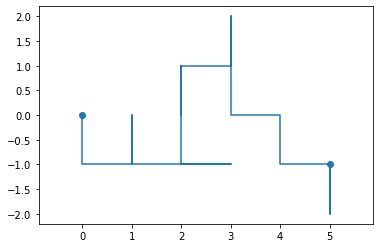

We will therefore call these paths **cactus paths**. (We have invented the concept and the name for the sake of this project.) To further clarify the definition, consider a few short paths (starting at the origin) with only north (N) and south (S) steps. The paths NSN and NSNN are allowed, but NSNS is not allowed: all three paths contain immediate reversals (which are allowed), but the third path visits the origin three times (which is not allowed). 

*Note.* The questions in this part are very similar to those in Part I, except that they concern cactus paths rather than self-avoiding lattice paths. We **strongly recommend** that you fully understand Part I before attempting this part.

**8. [10 marks]** By modifying the function `enumerate_paths`, or otherwise, write a function `enumerate_cacti` which enumerates all cactus paths on the square lattice with a given number $n$ of steps. Your function should satisfy the following properties:
* It should have a single required input, an integer `n`. You may also find it useful to have an optional input `Path`, as in the function `enumerate_paths`.
* It should return the number of different $n$-step cactus paths on the square lattice (starting at the origin). 

Test your function by running the command
```python
[enumerate_cacti(n) for n in range(11)]
```
You should find that the first few numbers in this list are
```python
[1, 4, 16, 64, 220, 772, 2632, ...]
```

**9. [10 marks]** By modifying an appropriate function from above, or otherwise, write a function `generate_cactus` which returns a random cactus path of length $n$ (on $\mathbb Z^2$, starting at the origin). Your function should satisfy the following properties:
* It should have a single required input, an integer `n`. You may also find it useful to have an optional input `Path`, as in the function `enumerate_paths`.
* It should return a list whose elements are lists of length $2$, representing points in $\mathbb Z^2$ visited by the lattice path. 
* It may happen that a partially completed path cannot be extended to one with $n$ steps without intersecting itself; in this case, the function should simply return the 'trapped' path of length $<n$.

**10. [5 marks]** Use your function `generate_cactus` to produce two figures: 

(i) Create two cactus paths using `generate_cactus(100)` and draw these together in one figure. 

(ii) Create 10 cactus paths using `generate_cactus(10000)` and draw these together in a second figure. 

Ensure for each figure that the horizontal and vertical axes are drawn to the same scale.

### Part IV: The effect of defects on random walks [20 marks]

Finally, you are asked to investigate the effect of random defects of the lattice (as explained above). You have been provided with a Python file called **"data.py"** on QMPlus, which you should **save in the same directory as this Jupyter notebook**.
This file contains a function `create_defects` which creates 'random' defects on the square lattice. (These look random, but will be unique to you, i.e. no two students will have the same defects to work with.)

**11. [5 marks]** Execute the following code cell to create your lattice defects, storing the data in a list called `Defects`. You **must** replace the number "123456789" with your 9-digit student number. 

*Important note.* This question essentially gives you 5 free marks for typing your student ID correctly. If you do not do this correctly, you will score zero for this question, and if you instead use another student's ID, then your submission will be reviewed for plagiarism.

In [5]:
from data import create_defects

# Replace "123456789" below with your 9-digit student number

Defects = create_defects(123456789)

# Replace "123456789" above with your 9-digit student number

**12. [5 marks]** Plot the locations of the defect points in the $(x,y)$-plane, ensuring that horizontal and vertical axes are drawn to the same scale.

**13. [10 marks]** Instead of enumerating all self-avoiding lattice paths, now write a function `enumerate_walks_with_defects` which enumerates all $n$-step random walks (starting at the origin) that avoid all of the defect points given by `Defects`. Your function should satisfy the following properties:
* It should have a single required input, an integer `n`. You may also find it useful to have an optional input `Path`, as in previous functions.
* It should return the number of different $n$-step random walks that avoid all points in `Defects`.

Test your function by running the command
```python
[enumerate_walks_with_defects(n) for n in range(11)]
```

Briefly comment on how the number of $n$-step random walks that avoid `Defects` compares, for various values of $n$, with the total number of $n$-step simple random walks and the total number of self-avoiding $n$-step lattice paths  (all starting at the origin).